<a href="https://colab.research.google.com/github/wesleyorrr/Analise-de-satisfacao-Supermercados-e-mercearias-Curvelo-MG/blob/main/Analise_Satifacao_Sp_Curvelo_MG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Criação do DataFrame com os dados dos estabelecimentos**

In [ ]:
import pandas as pd


dados = {
    "Estabelecimento": [
        "Cordeiro Supermercados", "Hipermercado Marques Center Curvelo",
        "Supermercados BH - 1", "Bretas Atacarejo - Curvelo",
        "Supermercados BH - 2", "Mart Minas - Atacado & Varejo",
        "Cordeiro Atacarejo", "Supermercado Ki Joia",
        "Apoio Mineiro Curvelo", "Mercearia Santuá",
        "Ponto Certo Cereais ", "EmbalaBem",
        "Supermercado Matias", "Comercial Bela Vista",
        "Mercearia Nivete", "Super kit opção",
        "Mercearia Nossa Senhora da Conceição", "Mercearia Palmeiras ",
        "Mercearia do Julinho"

    ],
    "Nota": [
        4.5, 4.5, 4.6, 4.6, 4.0, 4.1, 4.5, 4.6, 4.1, 3.7,
        4.1, 4.3, 4.3, 4.4, 4.1, 4.6, 4.5, 4.5, 4.4
    ]
}

df = pd.DataFrame(dados)
df.head()

,Estabelecimento,Nota
0,Cordeiro Supermercados,4.5
1,Hipermercado Marques Center Curvelo,4.5
2,Supermercados BH - 1,4.6
3,Bretas Atacarejo - Curvelo,4.6
4,Supermercados BH - 2,4.0


# **Classificação do tipo de estabelecimento**

In [ ]:
def classificar_tipo(nome):
    nome = nome.lower()
    if "mercearia" in nome:
        return "Mercearia"
    elif "atacarejo" in nome or "mart minas" in nome:
        return "Atacarejo"
    elif "supermercado" in nome or "bh" in nome or "apoio" in nome or "hiper" in nome:
        return "Supermercado"
    else:
        return "Outro"

df["Tipo"] = df["Estabelecimento"].apply(classificar_tipo)
df.head()


,Estabelecimento,Nota,Tipo
0,Cordeiro Supermercados,4.5,Supermercado
1,Hipermercado Marques Center Curvelo,4.5,Supermercado
2,Supermercados BH - 1,4.6,Supermercado
3,Bretas Atacarejo - Curvelo,4.6,Atacarejo
4,Supermercados BH - 2,4.0,Supermercado


#  **Média de notas por tipo de estabelecimento**

In [ ]:

media_por_tipo = df.groupby("Tipo")["Nota"].mean().sort_values(ascending=False)
print("📌 Média de notas por tipo de estabelecimento:")
print(media_por_tipo)


quantidade_por_tipo = df["Tipo"].value_counts()
print("\n📌 Quantidade de estabelecimentos por tipo:")
print(quantidade_por_tipo)


melhores = df.sort_values(by="Nota", ascending=False).head(5)
print("\n📌 Top 5 estabelecimentos com melhores notas:")
print(melhores)

piores = df.sort_values(by="Nota").head(5)
print("\n📌 Top 5 estabelecimentos com piores notas:")
print(piores)


📌 Média de notas por tipo de estabelecimento:
Tipo
Atacarejo       4.400000
Supermercado    4.371429
Outro           4.350000
Mercearia       4.240000
Name: Nota, dtype: float64

📌 Quantidade de estabelecimentos por tipo:
Tipo
Supermercado    7
Mercearia       5
Outro           4
Atacarejo       3
Name: count, dtype: int64

📌 Top 5 estabelecimentos com melhores notas:
               Estabelecimento  Nota          Tipo
2         Supermercados BH - 1   4.6  Supermercado
7         Supermercado Ki Joia   4.6  Supermercado
3   Bretas Atacarejo - Curvelo   4.6     Atacarejo
15             Super kit opção   4.6         Outro
0       Cordeiro Supermercados   4.5  Supermercado

📌 Top 5 estabelecimentos com piores notas:
                  Estabelecimento  Nota          Tipo
9                Mercearia Santuá   3.7     Mercearia
4            Supermercados BH - 2   4.0  Supermercado
8           Apoio Mineiro Curvelo   4.1  Supermercado
5   Mart Minas - Atacado & Varejo   4.1     Atacarejo
14       

# **Quantidade de estabelecimentos por tipo**

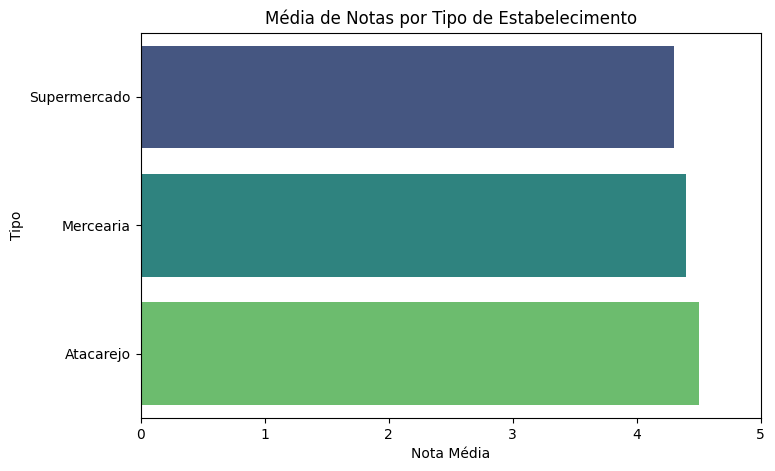

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


media_por_tipo = pd.Series({
    "Supermercado": 4.3,
    "Mercearia": 4.4,
    "Atacarejo": 4.5
})


plt.figure(figsize=(8, 5))
sns.barplot(
    x=media_por_tipo.values,
    y=media_por_tipo.index,
    hue=media_por_tipo.index,
    palette="viridis",
    dodge=False,
    legend=False
)
plt.title("Média de Notas por Tipo de Estabelecimento")
plt.xlabel("Nota Média")
plt.ylabel("Tipo")
plt.xlim(0, 5)
plt.show()



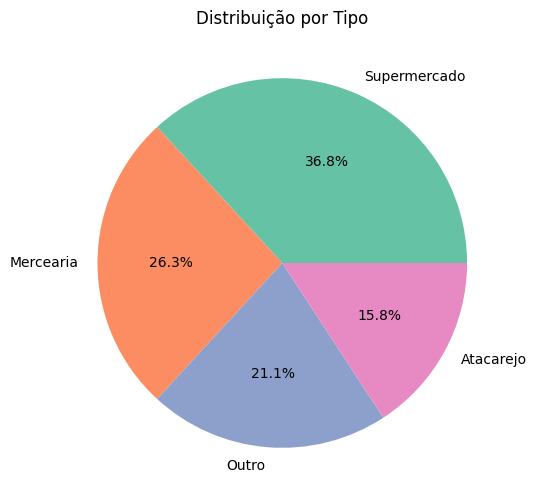

In [ ]:

cores = sns.color_palette('Set2')
quantidade_por_tipo.plot.pie(autopct='%1.1f%%', colors=cores, figsize=(6, 6), title="Distribuição por Tipo")
plt.ylabel("")
plt.show()


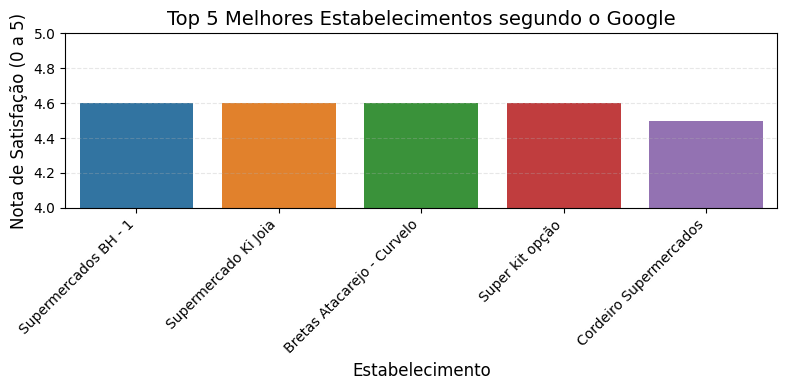

In [ ]:
plt.figure(figsize=(8, 4))
sns.barplot(
    x="Estabelecimento",
    y="Nota",
    data=melhores,
    hue="Estabelecimento",      # define a legenda automaticamente
    dodge=False,                # barras não agrupadas
    legend=False                # desativa a legenda
)
plt.title("Top 5 Melhores Estabelecimentos segundo o Google", fontsize=14)
plt.xlabel("Estabelecimento", fontsize=12)
plt.ylabel("Nota de Satisfação (0 a 5)", fontsize=12)
plt.ylim(4, 5)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()




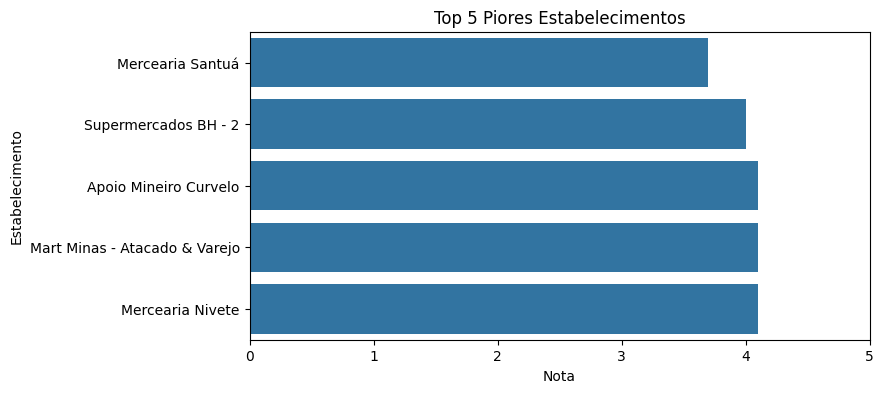

In [ ]:
plt.figure(figsize=(8, 4))
sns.barplot(x="Nota", y="Estabelecimento", data=piores)
plt.title("Top 5 Piores Estabelecimentos")
plt.xlim(0, 5)
plt.show()

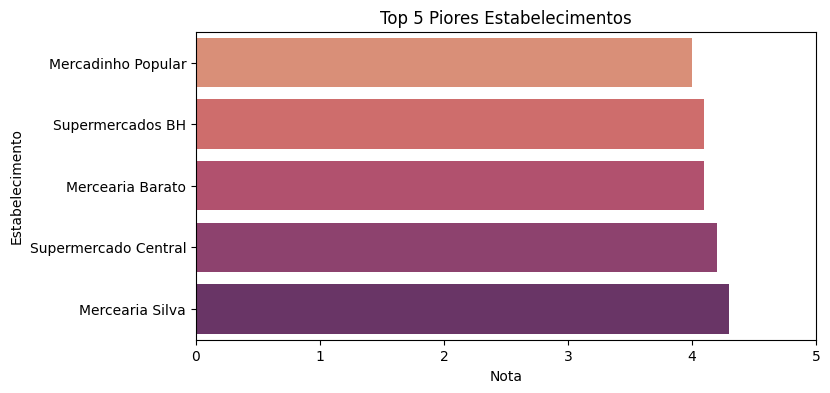

In [ ]:
plt.figure(figsize=(8, 4))
sns.barplot(
    x="Nota",
    y="Estabelecimento",
    data=piores,
    hue="Estabelecimento",
    palette="flare",
    legend=False
)
plt.title("Top 5 Piores Estabelecimentos")
plt.xlim(0, 5)
plt.show()


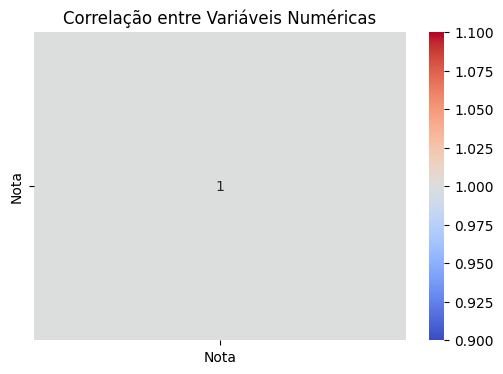

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Correlação entre Variáveis Numéricas")
plt.show()
